In [62]:
import pandas as pd
import numpy as np

In [6]:
df= pd.read_csv(f'file:///Users/dariastachowiak/Downloads/final_dataframe.csv')

In [7]:
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [13]:
y = df['label']
X = df.loc[:, df.columns != 'label']

In [14]:
scaler = preprocessing.MinMaxScaler()
columns = X.columns
d = scaler.fit_transform(X)
scaled_df = pd.DataFrame(d, columns=columns)
scaled_df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.113487,0.362279,0.695468,0.318188,0.101983,0.314117,0.040233,0.422879,0.109789,0.385532,...,0.564186,0.112704,0.541287,0.057615,0.422444,0.082450,0.487950,0.109503,0.599189,0.078255
1,0.113487,0.343622,0.793392,0.230894,0.085580,0.248405,0.121475,0.436889,0.296867,0.353329,...,0.570198,0.120353,0.574685,0.118286,0.448184,0.102997,0.548800,0.099081,0.579640,0.075947
2,0.113487,0.389832,0.640692,0.433652,0.099064,0.254261,0.049046,0.325334,0.095712,0.289224,...,0.622467,0.081898,0.331003,0.085962,0.370988,0.116420,0.453724,0.087317,0.501381,0.045405
3,0.113487,0.473508,0.777954,0.345856,0.229160,0.129376,0.058253,0.267404,0.227566,0.181068,...,0.565151,0.091876,0.484549,0.092509,0.460684,0.068975,0.538690,0.062612,0.468060,0.048168
4,0.113487,0.277759,0.681062,0.219641,0.083075,0.327270,0.110761,0.325514,0.113536,0.357017,...,0.383289,0.200462,0.410225,0.156424,0.403875,0.120300,0.424652,0.130173,0.233047,0.094836


In [15]:
X=scaled_df

In [26]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=7)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import cross_val_score

In [85]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((700, 58), (300, 58), (700,), (300,))

In [114]:
def model_tester(model):
    
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)

    print(type(model).__name__)    
    print("----------------------------------")
    print("Confusion matrix:")
    print(confusion_matrix(y_test, predictions))

    print("\nAccuracy:", accuracy_score(y_test, predictions))

    print("\nClassification report:")
    print(classification_report(y_test, predictions))


In [115]:
model_tester(LogisticRegression())

LogisticRegression
----------------------------------
Confusion matrix:
[[15  0  1  1  1  4  7  0  0  0]
 [ 0 24  0  0  0  1  0  0  0  1]
 [ 6  0 15  0  1  1  0  1  1  2]
 [ 0  1  0 12  6  0  2  2  0  6]
 [ 1  0  0  2 14  0  7  3  2  0]
 [ 1  2  1  0  0 20  0  1  1  0]
 [ 1  0  0  0  0  0 30  0  0  0]
 [ 0  0  2  1  1  0  0 32  2  2]
 [ 2  0  3  1  2  0  0  2 17  1]
 [ 4  0  3  9  0  1  5  2  1 10]]

Accuracy: 0.63

Classification report:
              precision    recall  f1-score   support

       blues       0.50      0.52      0.51        29
   classical       0.89      0.92      0.91        26
     country       0.60      0.56      0.58        27
       disco       0.46      0.41      0.44        29
      hiphop       0.56      0.48      0.52        29
        jazz       0.74      0.77      0.75        26
       metal       0.59      0.97      0.73        31
         pop       0.74      0.80      0.77        40
      reggae       0.71      0.61      0.65        28
        rock    

/Users/dariastachowiak/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing out other classification models:

In [116]:
model_tester(RandomForestClassifier())

RandomForestClassifier
----------------------------------
Confusion matrix:
[[22  0  2  0  1  1  3  0  0  0]
 [ 0 23  0  0  0  3  0  0  0  0]
 [ 2  0 23  1  0  0  0  0  0  1]
 [ 0  1  1 23  3  0  0  0  0  1]
 [ 1  0  0  1 25  0  0  1  1  0]
 [ 1  3  1  0  0 20  0  0  0  1]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  1  0  0 34  5  0]
 [ 3  0  3  0  1  0  0  3 18  0]
 [ 2  0  5  3  0  0  2  1  1 21]]

Accuracy: 0.8

Classification report:
              precision    recall  f1-score   support

       blues       0.71      0.76      0.73        29
   classical       0.85      0.88      0.87        26
     country       0.66      0.85      0.74        27
       disco       0.82      0.79      0.81        29
      hiphop       0.81      0.86      0.83        29
        jazz       0.83      0.77      0.80        26
       metal       0.86      1.00      0.93        31
         pop       0.87      0.85      0.86        40
      reggae       0.72      0.64      0.68        28
        rock 

In [117]:
model_tester(DecisionTreeClassifier())

DecisionTreeClassifier
----------------------------------
Confusion matrix:
[[10  0  4  1  4  2  3  0  2  3]
 [ 0 19  1  0  0  5  0  0  0  1]
 [ 0  1 17  0  2  1  0  1  0  5]
 [ 0  1  5 12  7  0  1  0  0  3]
 [ 0  0  0  1 22  1  1  1  2  1]
 [ 4  2  3  0  0 15  0  0  0  2]
 [ 0  0  0  4  1  1 25  0  0  0]
 [ 0  0  2  0  1  0  1 29  7  0]
 [ 0  0  1  1  2  0  0  6 14  4]
 [ 4  1  9  4  0  2  2  0  1 12]]

Accuracy: 0.5833333333333334

Classification report:
              precision    recall  f1-score   support

       blues       0.56      0.34      0.43        29
   classical       0.79      0.73      0.76        26
     country       0.40      0.63      0.49        27
       disco       0.52      0.41      0.46        29
      hiphop       0.56      0.76      0.65        29
        jazz       0.56      0.58      0.57        26
       metal       0.76      0.81      0.78        31
         pop       0.78      0.72      0.75        40
      reggae       0.54      0.50      0.52        2

In [118]:
model_tester(SVC())

SVC
----------------------------------
Confusion matrix:
[[18  0  1  1  0  2  7  0  0  0]
 [ 0 24  0  0  0  1  0  0  0  1]
 [ 0  0 19  3  0  1  0  0  1  3]
 [ 0  1  1 17  2  0  2  2  0  4]
 [ 2  0  0  2 14  0  5  3  3  0]
 [ 1  2  1  0  0 21  0  0  1  0]
 [ 1  0  0  0  0  0 30  0  0  0]
 [ 0  0  3  4  1  0  0 29  2  1]
 [ 2  0  2  1  3  0  0  2 16  2]
 [ 3  0  8 10  0  0  4  0  1  9]]

Accuracy: 0.6566666666666666

Classification report:
              precision    recall  f1-score   support

       blues       0.67      0.62      0.64        29
   classical       0.89      0.92      0.91        26
     country       0.54      0.70      0.61        27
       disco       0.45      0.59      0.51        29
      hiphop       0.70      0.48      0.57        29
        jazz       0.84      0.81      0.82        26
       metal       0.62      0.97      0.76        31
         pop       0.81      0.72      0.76        40
      reggae       0.67      0.57      0.62        28
        rock     

In [119]:
model_tester(GaussianNB())

GaussianNB
----------------------------------
Confusion matrix:
[[18  0  0  1  0  0 10  0  0  0]
 [ 0 22  0  0  0  2  0  0  0  2]
 [ 9  0 10  3  0  1  2  0  1  1]
 [ 0  1  2 10  5  0  6  0  3  2]
 [ 2  0  0  5 14  0  5  0  2  1]
 [ 9  3  1  0  0  8  0  0  2  3]
 [ 1  0  0  2  0  0 28  0  0  0]
 [ 0  0  2  0  2  0  0 33  2  1]
 [ 7  0  4  0  1  0  0  4 12  0]
 [ 9  0  1  7  2  0 11  0  1  4]]

Accuracy: 0.53

Classification report:
              precision    recall  f1-score   support

       blues       0.33      0.62      0.43        29
   classical       0.85      0.85      0.85        26
     country       0.50      0.37      0.43        27
       disco       0.36      0.34      0.35        29
      hiphop       0.58      0.48      0.53        29
        jazz       0.73      0.31      0.43        26
       metal       0.45      0.90      0.60        31
         pop       0.89      0.82      0.86        40
      reggae       0.52      0.43      0.47        28
        rock       0.29 

In [120]:
error=[]
for i in range(1, 58):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

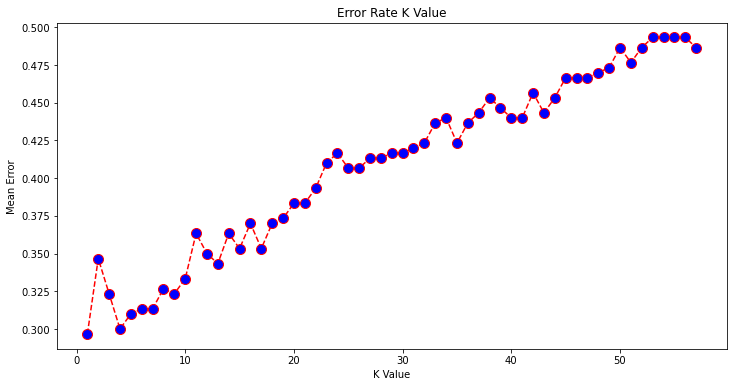

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 58), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [122]:
model_tester(KNeighborsClassifier(n_neighbors=2))

KNeighborsClassifier
----------------------------------
Confusion matrix:
[[22  0  2  2  0  1  2  0  0  0]
 [ 0 25  0  1  0  0  0  0  0  0]
 [ 2  0 22  0  0  1  0  1  0  1]
 [ 1  1  3 19  3  0  0  0  1  1]
 [ 0  0  3  2 21  0  0  1  2  0]
 [ 1  4  5  0  1 15  0  0  0  0]
 [ 3  0  0  2  1  0 25  0  0  0]
 [ 0  0  3  5  3  0  0 29  0  0]
 [ 2  0  5  5  5  0  0  2  9  0]
 [ 1  0  9 12  0  0  1  0  3  9]]

Accuracy: 0.6533333333333333

Classification report:
              precision    recall  f1-score   support

       blues       0.69      0.76      0.72        29
   classical       0.83      0.96      0.89        26
     country       0.42      0.81      0.56        27
       disco       0.40      0.66      0.49        29
      hiphop       0.62      0.72      0.67        29
        jazz       0.88      0.58      0.70        26
       metal       0.89      0.81      0.85        31
         pop       0.88      0.72      0.79        40
      reggae       0.60      0.32      0.42        28


In [123]:
model_tester(MLPClassifier(solver='lbfgs'))

MLPClassifier
----------------------------------
Confusion matrix:
[[17  0  0  2  3  3  2  0  2  0]
 [ 0 26  0  0  0  0  0  0  0  0]
 [ 5  0 19  0  0  0  0  1  0  2]
 [ 1  1  1 15  4  0  1  0  0  6]
 [ 1  0  0  0 23  0  1  2  2  0]
 [ 1  5  0  0  0 19  0  0  1  0]
 [ 1  0  0  1  0  0 27  0  0  2]
 [ 0  0  2  4  1  0  0 27  2  4]
 [ 2  0  1  2  4  0  0  2 14  3]
 [ 4  0  5  2  0  0  1  0  1 22]]

Accuracy: 0.6966666666666667

Classification report:
              precision    recall  f1-score   support

       blues       0.53      0.59      0.56        29
   classical       0.81      1.00      0.90        26
     country       0.68      0.70      0.69        27
       disco       0.58      0.52      0.55        29
      hiphop       0.66      0.79      0.72        29
        jazz       0.86      0.73      0.79        26
       metal       0.84      0.87      0.86        31
         pop       0.84      0.68      0.75        40
      reggae       0.64      0.50      0.56        28
       

/Users/dariastachowiak/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [124]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
predictions=rf.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, predictions))



Accuracy: 0.7966666666666666


Feature ranking:
1. feature 16 (0.041668)
2. feature 1 (0.040826)
3. feature 0 (0.035247)
4. feature 4 (0.029508)
5. feature 3 (0.029197)
6. feature 2 (0.027367)
7. feature 27 (0.026935)
8. feature 7 (0.026923)
9. feature 24 (0.026308)
10. feature 18 (0.026027)
11. feature 9 (0.024313)
12. feature 14 (0.024159)
13. feature 10 (0.022948)
14. feature 5 (0.022110)
15. feature 28 (0.021688)
16. feature 6 (0.020014)
17. feature 57 (0.019617)
18. feature 34 (0.019493)
19. feature 19 (0.018694)
20. feature 40 (0.017287)
21. feature 23 (0.017231)
22. feature 37 (0.017126)
23. feature 32 (0.017037)
24. feature 15 (0.016572)
25. feature 12 (0.016236)
26. feature 50 (0.016171)
27. feature 31 (0.015969)
28. feature 13 (0.015893)
29. feature 11 (0.015478)
30. feature 33 (0.015374)
31. feature 29 (0.015350)
32. feature 20 (0.015335)
33. feature 25 (0.014968)
34. feature 30 (0.014540)
35. feature 36 (0.013646)
36. feature 42 (0.013202)
37. feature 26 (0.013148)
38. feature 55 (0.013104)
39. feature 4

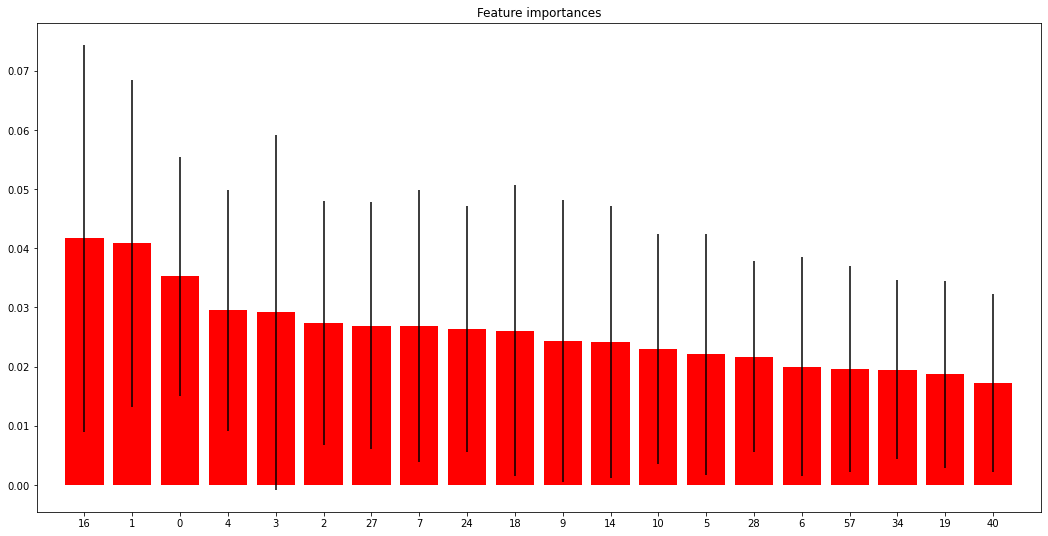

In [126]:
#feature importance
from sklearn.ensemble import ExtraTreesClassifier

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure(figsize=(18,9))
plt.title("Feature importances")
n=20
_ = plt.bar(range(n), importances[indices][:n], color="r", yerr=std[indices][:n])
plt.xticks(range(n), indices)
plt.xlim([-1, n])
plt.show()

In [138]:
print(df.columns)

Index(['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
       'label'

Tuning Random Forest Hyperparameters?